# Assignment 2: Linear Regression

<font color=darkblue>
    
In this assignment you will perform linear regression to predict the Boston housing price.

Enter the code along with your comments in each question section.

## Import Libraries & Data Overview

In [24]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.preprocessing import LabelEncoder

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [14]:
#Load boston housing dataset

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame for the input features (X) from the 'data' array
X = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

# Create a Series for the target variable (y) from the 'target'
y = pd.Series(target, name="MEDV")

#"target" is the response variable
# which represents the median value of owner-occupied homes in $1000
#y = boston_housing['target']

In [15]:
X['target'] = y

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



## Exploratory Data Analysis

### Q1.1 Correlation Matrix

Prevent collinearity by removing linearly dependent variables.

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

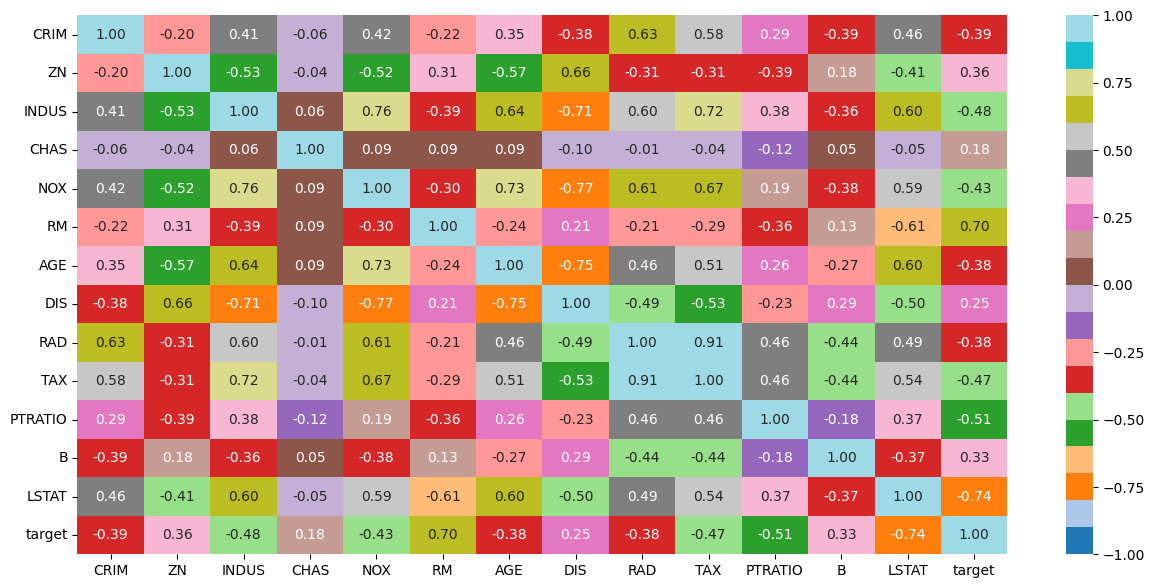

In [21]:
#Plotting Correlation Plot
plt.figure(figsize = (15,7))
sns.heatmap(X.corr(), annot = True, vmin = -1, vmax = +1, fmt = '.2f', cmap = 'tab20')

#Dropping RAD from the data as its correlation coefficient with TAX is larger than 0.9 and dropping it will avoid redundency
X.drop(columns = ['RAD'], inplace = True)


## Data Preparation

### Q2.1 Data Partition

Partition the data into 75% training and 25% validation set.

In [26]:
#Separating independent variables and the target variable
x=X.drop('target',axis=1)

#Splitting the dataset into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

#Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (379, 12)
Shape of test set :  (127, 12)



## Model Building

### Q3.1 Linear Regression Model

If we fit a linear regression model on the training set, what will be the feature weights?

In [31]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Get the feature weights
feature_weights = model.coef_

# Print the feature weights
print("Feature Weights:", feature_weights)


Feature Weights: [ -0.08155862   0.04645002  -0.03608562   2.84520108 -19.3081511
   3.14465282   0.00243011  -1.44971901   0.00345133  -0.90896743
   0.00524764  -0.54910594]


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Q3.2 Linear Regression with Two Predictors

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice.

Present the model summary. We call this model **Model 1**.

In [52]:
import statsmodels.api as sm

# Create a DataFrame with only 'Age' and 'RM' as input variables
X_train_model1 = x_train[['AGE', 'RM']]

# Adding a constant term to the input variables
X_train_model1 = sm.add_constant(X_train_model1)

x_test1 = sm.add_constant(x_test[['AGE', 'RM']])

# Fit a linear regression model
model1 = sm.OLS(y_train, X_train_model1).fit()

# Print the model summary
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           7.06e-56
Time:                        05:36:34   Log-Likelihood:                -1238.7
No. Observations:                 379   AIC:                             2483.
Df Residuals:                     376   BIC:                             2495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1410      3.465     -5.525      0.0

### Q3.3 Model 1 Performance Evaluation

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance metrics.

In [74]:

# Replace 'model' with your actual trained Model 1
predictions = model1.predict(x_test1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 6.236968213396189
MAE: 4.69224637707995


### Q3.4 Linear Regression with All Predictors

Now consider all the features (after removing linearly dependent variables).

Fit a linear regression model on the training set with a package at your choice. Present the model summary.

We call this model **Model 2**.

In [75]:
import statsmodels.api as sm

# Create a DataFrame with only 'Age' and 'RM' as input variables
X_train_model2 = x_train

# Add a constant (intercept) term to the input variables
X_train_model2 = sm.add_constant(X_train_model2)

x_test2 = sm.add_constant(x_test)

# Fit a linear regression model
model2 = sm.OLS(y_train, X_train_model2).fit()

# Print the model summary
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     73.19
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           1.84e-89
Time:                        06:25:03   Log-Likelihood:                -1134.8
No. Observations:                 379   AIC:                             2296.
Df Residuals:                     366   BIC:                             2347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3159      5.900      6.663      0.0

### Q3.5 Model 2 Performance Evaluation

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance metrics.

In [76]:

# Replace 'model' with your actual trained Model 1
predictions2 = model2.predict(x_test2)

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(y_test, predictions2))

# Calculate MAE
mae2 = mean_absolute_error(y_test, predictions2)

print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")

RMSE: 4.824989720640997
MAE: 3.6757495758030854


### Q3.6 Model Performance Comparison

Compare the performance of Model 1 and Model 2.

Visualize the prediction error of both models using histogram.

Comment on the model fitting.

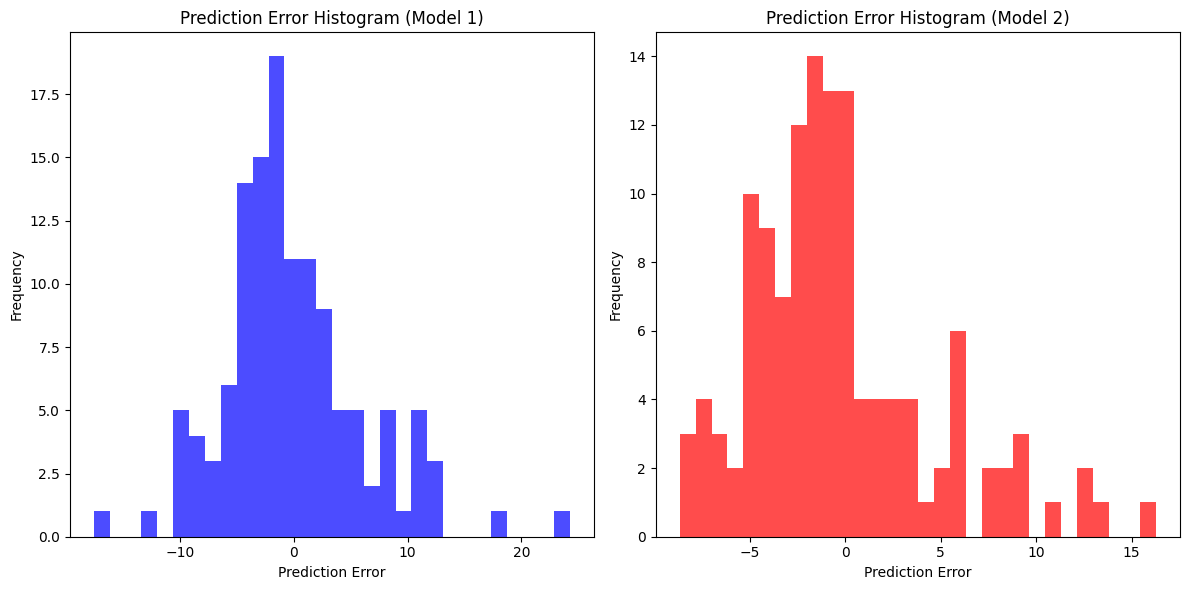

In [77]:
# Calculate the prediction errors for Model 1 and Model 2
error1 = y_test - predictions
error2 = y_test - predictions2

# Create histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error1, bins=30, color='blue', alpha=0.7)
plt.title('Prediction Error Histogram (Model 1)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(error2, bins=30, color='red', alpha=0.7)
plt.title('Prediction Error Histogram (Model 2)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Model2 has a lower RMSE and MAE, indicating better predictive performance.
The prediction errors are normally distributed, and they have certain biases.

### Q3.7 Linear Regression with Ridge Regression

Now consider all the features (after removing linearly dependent variables) to fit a Ridge regression model on the training set with a package at your choice.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [78]:
alpha = 1.0
Model3 = Ridge(alpha=alpha)
Model3.fit(x_train, y_train)

print("Ridge Regression Model (Model 3) Summary:")
print(f"Lambda (alpha): {alpha}")
print(f"Intercept: {Model3.intercept_}")
for i, coef in enumerate(Model3.coef_):
    print(f"Feature {i + 1}: {coef}")


Ridge Regression Model (Model 3) Summary:
Lambda (alpha): 1.0
Intercept: 33.25089994642161
Feature 1: -0.07876959984789221
Feature 2: 0.04800822279338141
Feature 3: -0.07287956056448187
Feature 4: 2.5699110767545954
Feature 5: -10.481239222741012
Feature 6: 3.2095721137423174
Feature 7: -0.004719493560720871
Feature 8: -1.3267657458463256
Feature 9: 0.0016492418481036737
Feature 10: -0.8085246320772133
Feature 11: 0.005837466476500478
Feature 12: -0.5599990774735423


### Q3.8 Model 3 Performance Evaluation

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance metrics.

In [79]:
predictions3 = Model3.predict(x_test)
rmse3 = np.sqrt(mean_squared_error(y_test, predictions3))
mae3 = mean_absolute_error(y_test, predictions3)
print(f"RMSE (Model 3): {rmse3}")
print(f"MAE (Model 3): {mae3}")


RMSE (Model 3): 4.754243785370782
MAE (Model 3): 3.5798866102524314


## Model Selection

### Q4.1 Model Comparison & Selection

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

*Model 1 is a two-predictor linear regression model, which can make it simple model. Since it has fewer features, it cannot capture complex relationships in the data. It has high RMSE and MAE.

Model 2 is likewise a linear regression model that makes use of all available factors in order to possibly capture correlations with greater complexity. But it has higher risk of overfitting.

Model 3 would be a good choice as the RMSE and MAE are the lowest. Also, we can control regularization with alpha. A regularized model, Ridge Regression with All Predictors, performs better in multicollinearity and prevents overfitting.
*